In [ ]:
import networkx as nx
import numpy as np
import stim

import mqt.qecc.co3 as co
from mqt.qecc import CSSCode

## Examples for Snake Constructions

### Color Code snakes stitched together by semi transparent domain walls

#### Example with $d=5$

In [ ]:
m = 12
n = 12

g = nx.hexagonal_lattice_graph(m=m, n=n, periodic=False, with_positions=True, create_using=None)

In [ ]:
# qubit positions within each patch, must be given in the right order of adjacent patches
positions = [
    [
        (1, 1),
        (2, 1),
        (3, 1),
        (4, 1),
        (5, 1),
        (5, 2),
        (4, 2),
        (3, 2),
        (2, 2),
        (2, 3),
        (3, 3),
        (4, 3),
        (4, 4),
        (3, 4),
        (2, 4),
        (3, 5),
        (4, 5),
        (3, 6),
        (3, 7),
    ],
    [
        (6, 2),
        (6, 3),
        (6, 4),
        (7, 4),
        (7, 5),
        (6, 5),
        (5, 5),
        (5, 6),
        (6, 6),
        (7, 6),
        (8, 7),
        (7, 7),
        (6, 7),
        (5, 7),
        (4, 8),
        (5, 8),
        (6, 8),
        (7, 8),
        (8, 8),
    ],
    [
        (4, 10),
        (5, 10),
        (6, 10),
        (7, 10),
        (8, 10),
        (8, 11),
        (7, 11),
        (6, 11),
        (5, 11),
        (5, 12),
        (6, 12),
        (7, 12),
        (7, 13),
        (6, 13),
        (5, 13),
        (6, 14),
        (7, 14),
        (6, 15),
        (6, 16),
    ],
    [
        (9, 11),
        (9, 12),
        (9, 13),
        (10, 13),
        (10, 14),
        (9, 14),
        (8, 14),
        (8, 15),
        (9, 15),
        (10, 15),
        (11, 16),
        (10, 16),
        (9, 16),
        (8, 16),
        (7, 17),
        (8, 17),
        (9, 17),
        (10, 17),
        (11, 17),
    ],
]

In [ ]:
d = 5
snake = co.SnakeBuilderSTDW(g, positions, d)

In [ ]:
z_plaquettes, x_plaquettes = snake.find_stabilizers()
snake.q_tilde - (len(z_plaquettes) + len(x_plaquettes)) == 1

True

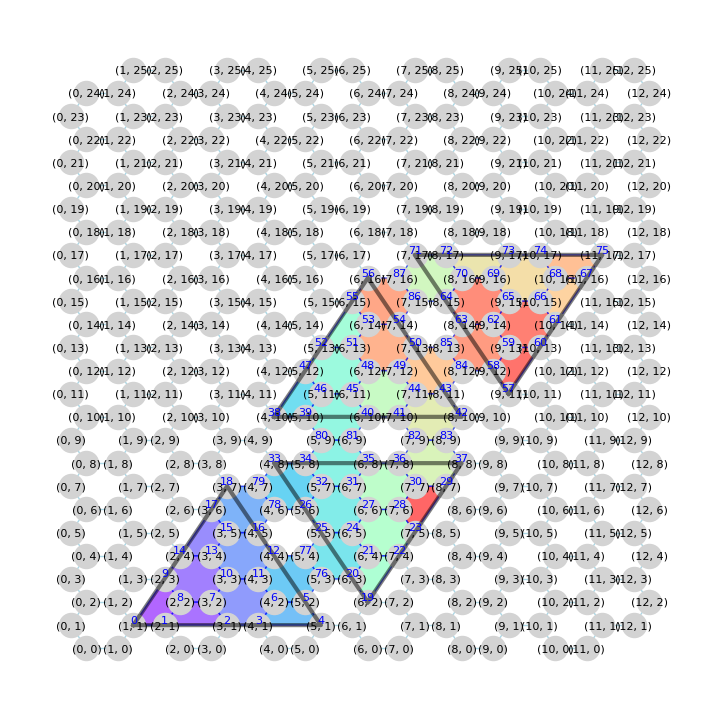

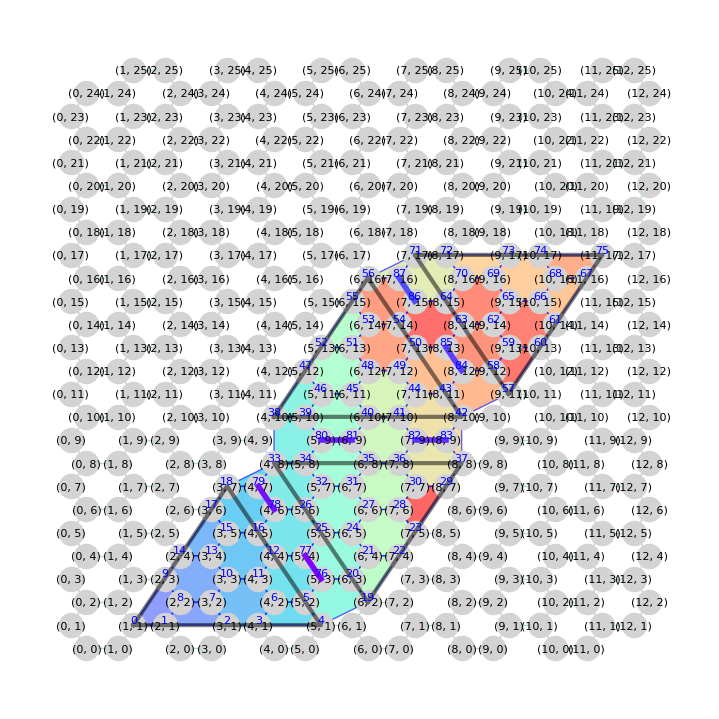

In [ ]:
snake.plot_stabilizers(x_plaquettes)
snake.plot_stabilizers(z_plaquettes)

In [ ]:
hz = snake.gen_check_matrix(z_plaquettes)
hx = snake.gen_check_matrix(x_plaquettes)

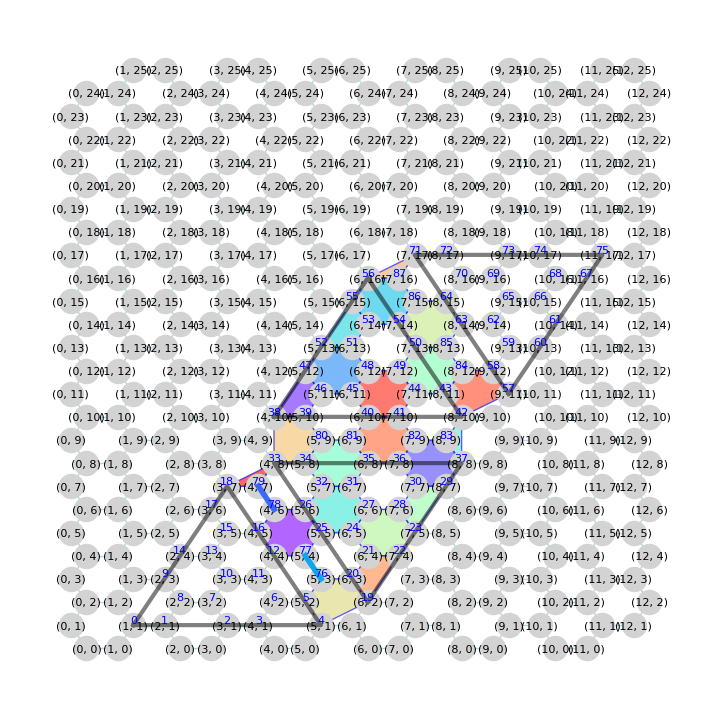

In [ ]:
# consider the boundary patches to be logical and find the subset of stabilizers to measure the logical ZZ between them
subset_stabs = snake.find_stabilizers_zz()
assert snake.test_zz_stabs(subset_stabs) is True

snake.plot_stabilizers(subset_stabs)

#### Example with $d=7$

In [ ]:
m = 12
n = 12

g = nx.hexagonal_lattice_graph(m=m, n=n, periodic=False, with_positions=True, create_using=None)

In [ ]:
positions = [
    [
        (1, 2),
        (2, 2),
        (3, 2),
        (4, 2),
        (5, 2),
        (6, 2),
        (7, 2),
        (6, 3),
        (5, 3),
        (4, 3),
        (3, 3),
        (2, 3),
        (1, 3),
        (2, 4),
        (3, 4),
        (4, 4),
        (5, 4),
        (6, 4),
        (6, 5),
        (5, 5),
        (4, 5),
        (3, 5),
        (2, 5),
        (2, 6),
        (3, 6),
        (4, 6),
        (5, 6),
        (5, 7),
        (4, 7),
        (3, 7),
        (3, 8),
        (4, 8),
        (5, 8),
        (4, 9),
        (3, 9),
        (4, 10),
        (4, 11),
    ],
    [
        (8, 3),
        (8, 4),
        (8, 5),
        (7, 5),
        (7, 6),
        (8, 6),
        (9, 6),
        (9, 7),
        (8, 7),
        (7, 7),
        (6, 8),
        (7, 8),
        (8, 8),
        (9, 8),
        (10, 9),
        (9, 9),
        (8, 9),
        (7, 9),
        (6, 9),
        (6, 10),
        (7, 10),
        (8, 10),
        (9, 10),
        (10, 10),
        (10, 11),
        (9, 11),
        (8, 11),
        (7, 11),
        (6, 11),
        (5, 11),
        (5, 12),
        (6, 12),
        (7, 12),
        (8, 12),
        (9, 12),
        (10, 12),
        (11, 12),
    ],
    [
        (5, 14),
        (6, 14),
        (7, 14),
        (8, 14),
        (9, 14),
        (10, 14),
        (11, 14),
        (10, 15),
        (9, 15),
        (8, 15),
        (7, 15),
        (6, 15),
        (5, 15),
        (6, 16),
        (7, 16),
        (8, 16),
        (9, 16),
        (10, 16),
        (10, 17),
        (9, 17),
        (8, 17),
        (7, 17),
        (6, 17),
        (6, 18),
        (7, 18),
        (8, 18),
        (9, 18),
        (9, 19),
        (8, 19),
        (7, 19),
        (7, 20),
        (8, 20),
        (9, 20),
        (8, 21),
        (7, 21),
        (8, 22),
        (8, 23),
    ],
]

In [ ]:
d = 7
snake = co.SnakeBuilderSTDW(g, positions, d)

In [ ]:
z_plaquettes, x_plaquettes = snake.find_stabilizers()
snake.q_tilde - (len(z_plaquettes) + len(x_plaquettes)) == 1

True

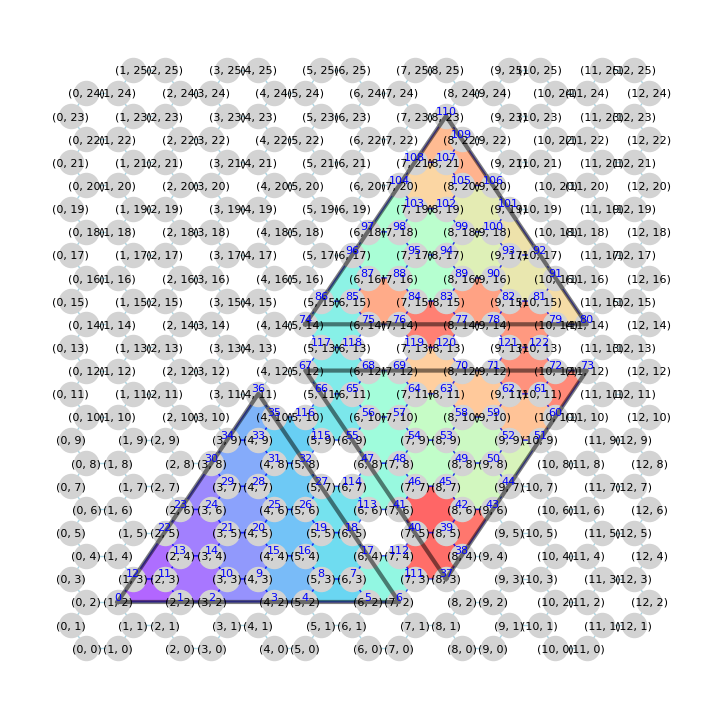

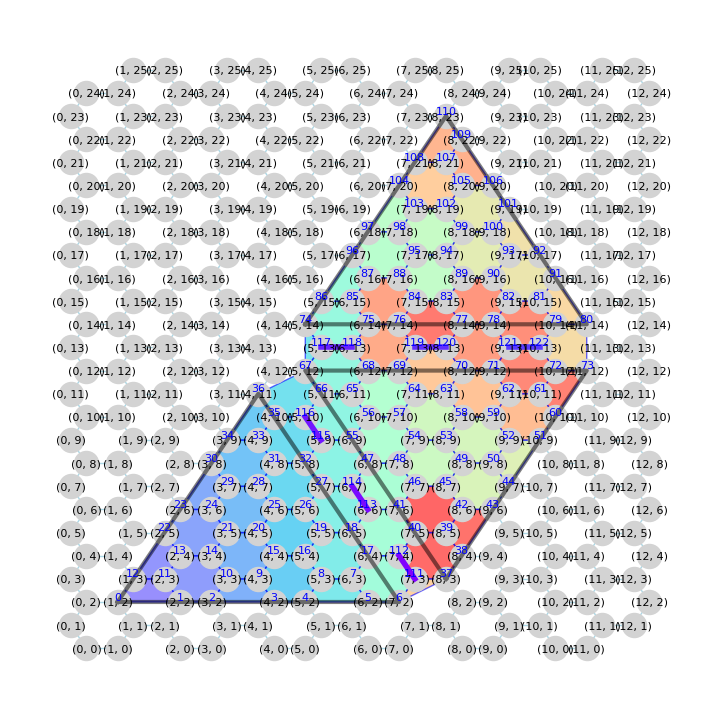

In [ ]:
snake.plot_stabilizers(x_plaquettes)
snake.plot_stabilizers(z_plaquettes)

In [ ]:
hz = snake.gen_check_matrix(z_plaquettes)
hx = snake.gen_check_matrix(x_plaquettes)

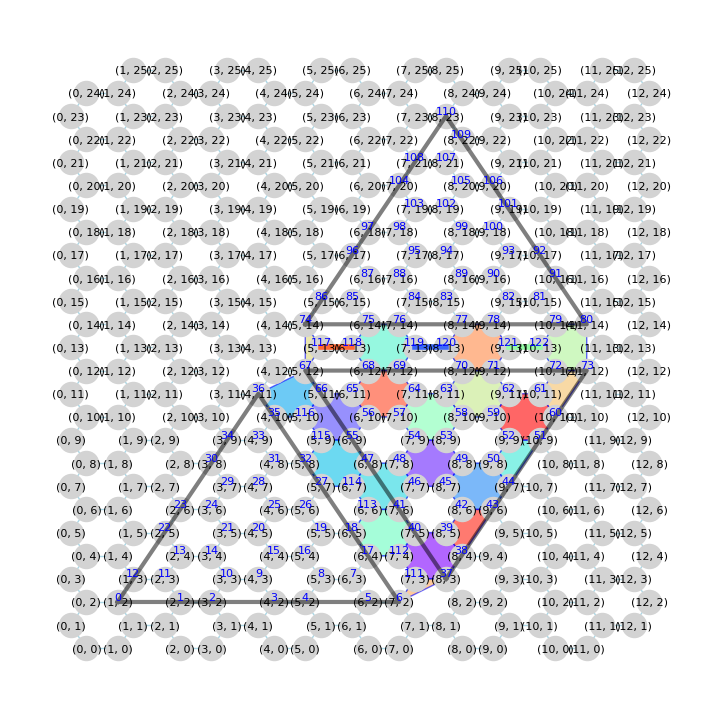

In [ ]:
# consider the boundary patches to be logical and find the subset of stabilizers to measure the logical ZZ between them
subset_stabs = snake.find_stabilizers_zz()
assert snake.test_zz_stabs(subset_stabs) is True

snake.plot_stabilizers(subset_stabs)

### Surface Code snakes between folded surface codes

One can choose any convex planar boundary on the graph to generate a surface code patch. This construction is therefore not fully general, also since folded surface codes as boundary patches can only be considered in their unfolded form.

for surface codes, the construction of stabilizers to multiply for the logical ZZ outcome is far more straightforward (measure all the stabilizers of specific type). Thus, no construction is provided as for the color code above.

In [ ]:
# helper fct

# function to translate above stabilizers into strings to use them for stim
def translate_intstabs_to_str(plaquettes: list[list[int]], q: int, stab_type: str) -> list[str]:
    """translates plaquettes into list of strings to use with stim.

    Args:
        plaquettes (list[list[int]]): _description_
        q (int): _description_
        stab_type (str) _description_

    Returns:
        list[str]: _description_
    """
    stabs_str = []
    for plaquette in plaquettes:
        temp = "_" * q
        for el in plaquette:
            temp = temp[:el] + stab_type + temp[el + 1 :]
        stabs_str.append(temp)
    return stabs_str


def logicals(snake: co.SnakeBuilderSC, d: int, hx: np.ndarray, hz: np.ndarray) -> tuple[list, list]:
    code = CSSCode(distance=d, Hx=hx, Hz=hz)

    assert len(code.Lx) == 1, "More than one qubit encoded!"
    assert len(code.Lz) == 1, "More than one qubit encoded!"

    # translate Lz into list of edges on the graph
    trans_dict_rev = {value: key for key, value in snake.trans_dict.items()}
    opz = []
    for i, el in enumerate(code.Lz[0]):
        if el == 1:
            opz.append(trans_dict_rev[i])
    opx = []
    for i, el in enumerate(code.Lx[0]):
        if el == 1:
            opx.append(trans_dict_rev[i])
    return opx, opz


def encoding_circuit(snake: co.SnakeBuilderSC, opx: list, opz: list) -> stim.Circuit:
    """checks whether an encoding circuit of a state defined by tableau can be built. just as sanity check."""

    stars_int = [[snake.trans_dict[el] for el in op] for op in snake.stars]

    plaquettes_int = [[snake.trans_dict[el] for el in op] for op in snake.plaquettes]

    q = len(snake.qubit_edges)
    stabs_str_z = translate_intstabs_to_str(plaquettes_int, q, "Z")
    stabs_str_z = [stim.PauliString(el) for el in stabs_str_z]
    stabs_str_x = translate_intstabs_to_str(stars_int, q, "X")
    stabs_str_x = [stim.PauliString(el) for el in stabs_str_x]
    # initialize + state, i.e. add logical X

    # ADD Z OPERATOR, i.e. initialize |0>
    op = opz
    op = [snake.trans_dict[el] for el in op]

    temp = "_" * q
    for el in op:
        temp = temp[:el] + "Z" + temp[el + 1 :]

    stabilizers = stabs_str_z + stabs_str_x + [stim.PauliString(temp)]
    tableau = stim.Tableau.from_stabilizers(stabilizers)
    circuit_0 = tableau.to_circuit("elimination")

    # ADD X OPERATOR i.e. initialize |+>
    op = opx
    op = [snake.trans_dict[el] for el in op]

    temp = "_" * q
    for el in op:
        temp = temp[:el] + "X" + temp[el + 1 :]

    stabilizers = stabs_str_z + stabs_str_x + [stim.PauliString(temp)]
    tableau = stim.Tableau.from_stabilizers(stabilizers)
    circuit_p = tableau.to_circuit("elimination")

    return circuit_p, circuit_0


def check_matchable(h: list) -> None:
    """checks whether max 2 nonzero entries per col"""
    _num_rows, num_cols = np.shape(h)
    for i in range(num_cols):
        col = h[:, i]
        num_nonzero = np.sum(col)
        # print(num_nonzero)
        if num_nonzero > 2:
            break

#### Example with $d=5$

In [ ]:
m, n = 20, 20
G = nx.grid_2d_graph(m, n)

# Define the position with the origin at the lower left
pos = {(x, y): (x, y) for x, y in G.nodes()}  # Keep y as positive

In [ ]:
d = 5

positions_smooth = [
    [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)],
    [(5, 13), (6, 13), (7, 13), (8, 13), (9, 13), (10, 13)],
]
positions_rough = [
    [
        (0, 0),
        (0, 1),
        (0, 2),
        (0, 3),
        (0, 4),
        (1, 5),
        (2, 6),
        (3, 7),
        (4, 8),
        (5, 9),
        (5, 10),
        (5, 11),
        (5, 12),
        (5, 13),
    ],
    [
        (5, 0),
        (5, 1),
        (5, 2),
        (5, 3),
        (5, 4),
        (6, 5),
        (7, 6),
        (8, 7),
        (9, 8),
        (10, 9),
        (10, 10),
        (10, 11),
        (10, 12),
        (10, 13),
    ],
]

In [ ]:
snake = co.SnakeBuilderSC(G, positions_rough, positions_smooth, d)

In [ ]:
_, _ = snake.create_stabs()

In [ ]:
hx, hz, trans_dict = snake.gen_checks()

In [ ]:
# generate logical ops

opx, opz = logicals(snake, d, hx, hz)

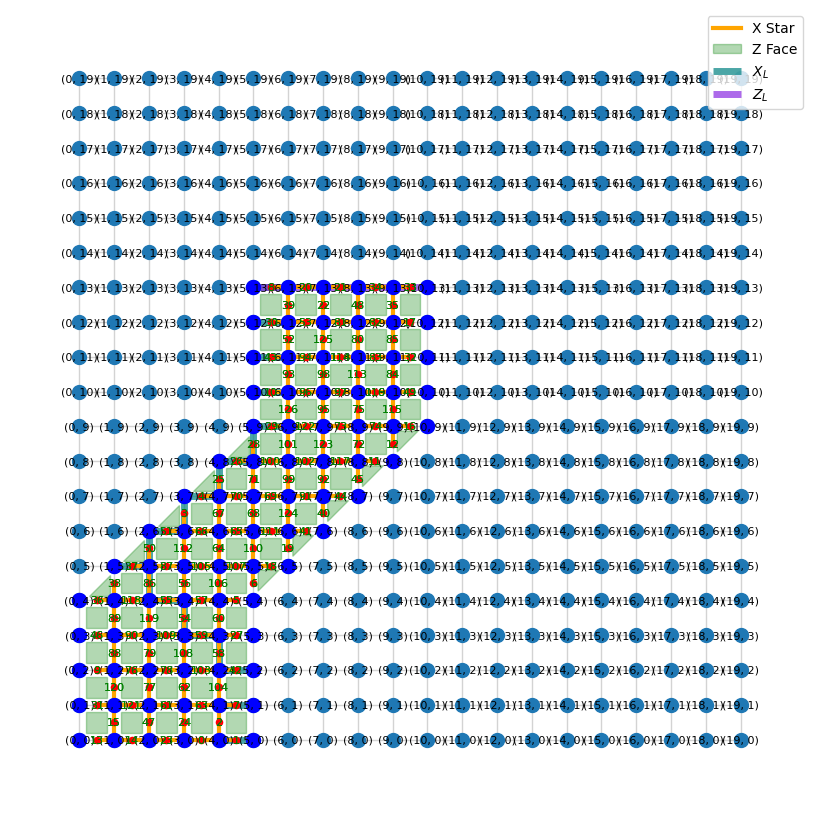

In [ ]:
snake.plot_stabs(opz, opx)

In [ ]:
circuit_p, circuit_0 = encoding_circuit(snake, opx, opz)

In [ ]:
check_matchable(hx)
check_matchable(hz)

#### Example for $d=7$

In [ ]:
m, n = 30, 30
G = nx.grid_2d_graph(m, n)
# Define the position with the origin at the lower left
pos = {(x, y): (x, y) for x, y in G.nodes()}  # Keep y as positive

In [ ]:
d = 7
positions_smooth = [
    [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
    [(7, 20), (8, 20), (9, 20), (10, 20), (11, 20), (12, 20), (13, 20), (14, 20)],
]
positions_rough = [
    [
        (7, 1),
        (7, 2),
        (7, 3),
        (7, 4),
        (7, 5),
        (7, 6),
        (7, 7),
        (8, 8),
        (9, 9),
        (10, 10),
        (11, 11),
        (12, 12),
        (13, 13),
        (14, 14),
        (14, 15),
        (14, 16),
        (14, 17),
        (14, 18),
        (14, 19),
        (14, 20),
    ],
    [
        (7, 20),
        (7, 19),
        (7, 18),
        (7, 17),
        (7, 16),
        (7, 15),
        (7, 14),
        (6, 13),
        (5, 12),
        (4, 11),
        (3, 10),
        (2, 9),
        (1, 8),
        (0, 7),
        (0, 6),
        (0, 5),
        (0, 4),
        (0, 3),
        (0, 2),
        (0, 1),
    ],
]

In [ ]:
snake = co.SnakeBuilderSC(G, positions_rough, positions_smooth, d)

In [ ]:
_, _ = snake.create_stabs()

In [ ]:
hx, hz, trans_dict = snake.gen_checks()

In [ ]:
# generate logical ops

opx, opz = logicals(snake, d, hx, hz)

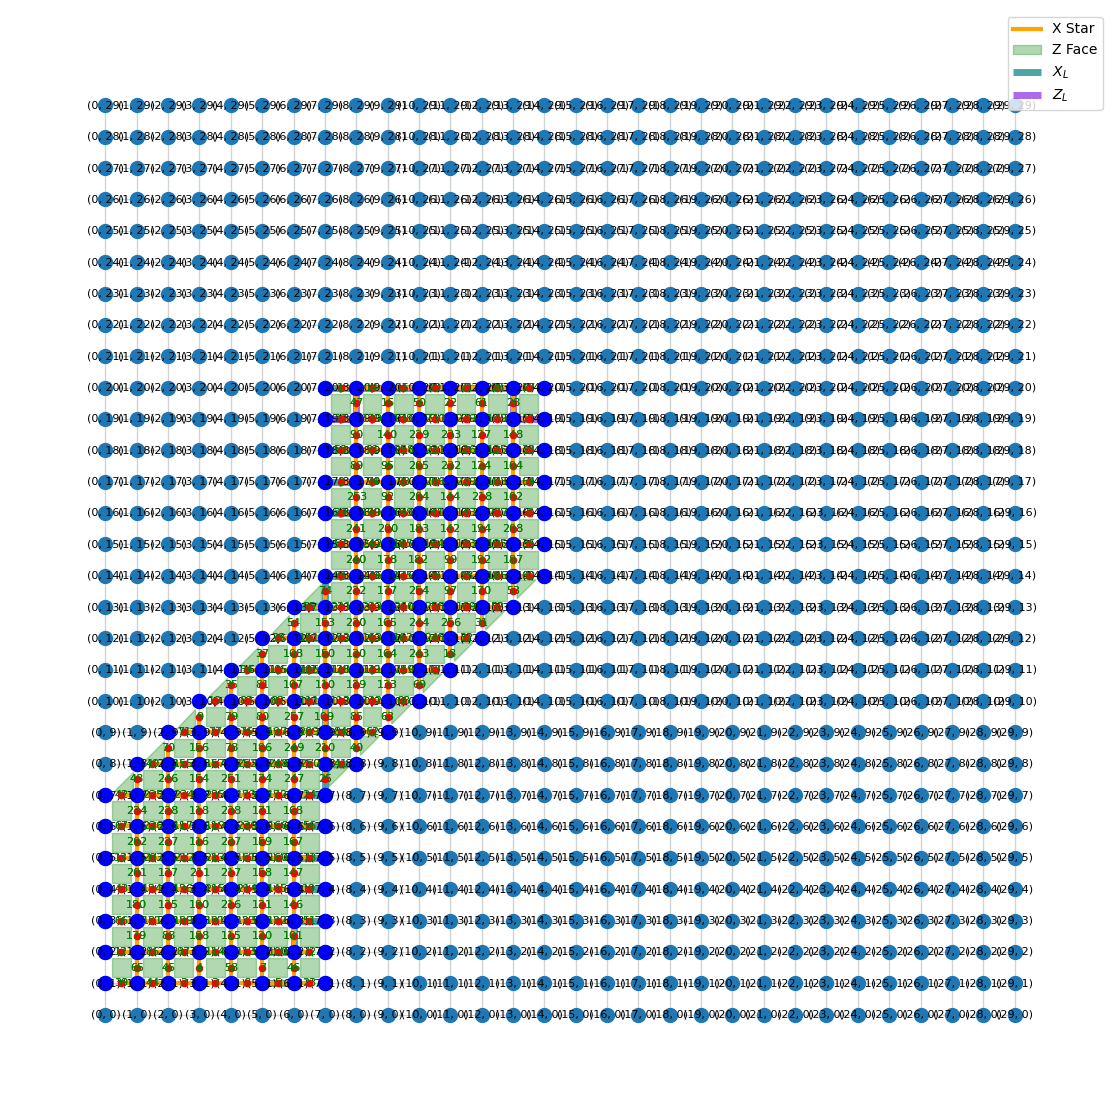

In [ ]:
size = (11, 11)
snake.plot_stabs(opz, opx, size=size)

In [ ]:
circuit_p, circuit_0 = encoding_circuit(snake, opx, opz)

In [ ]:
check_matchable(hx)
check_matchable(hz)